In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# # fix relative imports
# import os
# cwd = os.path.normpath(os.getcwd())
# cwd = cwd.split(os.sep)
# find = cwd.index("qs_qh")
# newdir = f"{os.sep}".join(cwd[:find+1])
# os.chdir(newdir)

from fradm.utils import *
from fradm.execute_circuits import *
from fradm.result_analysis import *
from fradm.plotting import *

# Challenges

## No ZNE

In [39]:
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
construct_batches_execution(LIST_QUBITS=qubits, LIST_DEPTHS=depths, stat_shots=3, zne=False)

[<IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_cusco')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_nazca')>]
ibm_kyiv
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 4, stat: 0
n_qubits: 4, depth: 4, stat: 1
n_qubits: 4, depth: 4, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 8, stat: 0
n_qubits: 4, depth: 8, stat: 1
n_qubits: 4, depth: 8, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 16, stat: 0
n_qubits: 4, depth: 16, stat: 1
n_qubits: 4, depth: 16, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical ob

### Get results and Plot

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]

In [4]:
zne = False
zne_extrapolator = "no_zne"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

NameError: name 'qubits' is not defined

<Figure size 2400x1800 with 0 Axes>

c:\Users\HP\anaconda3\envs\qs_qh\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


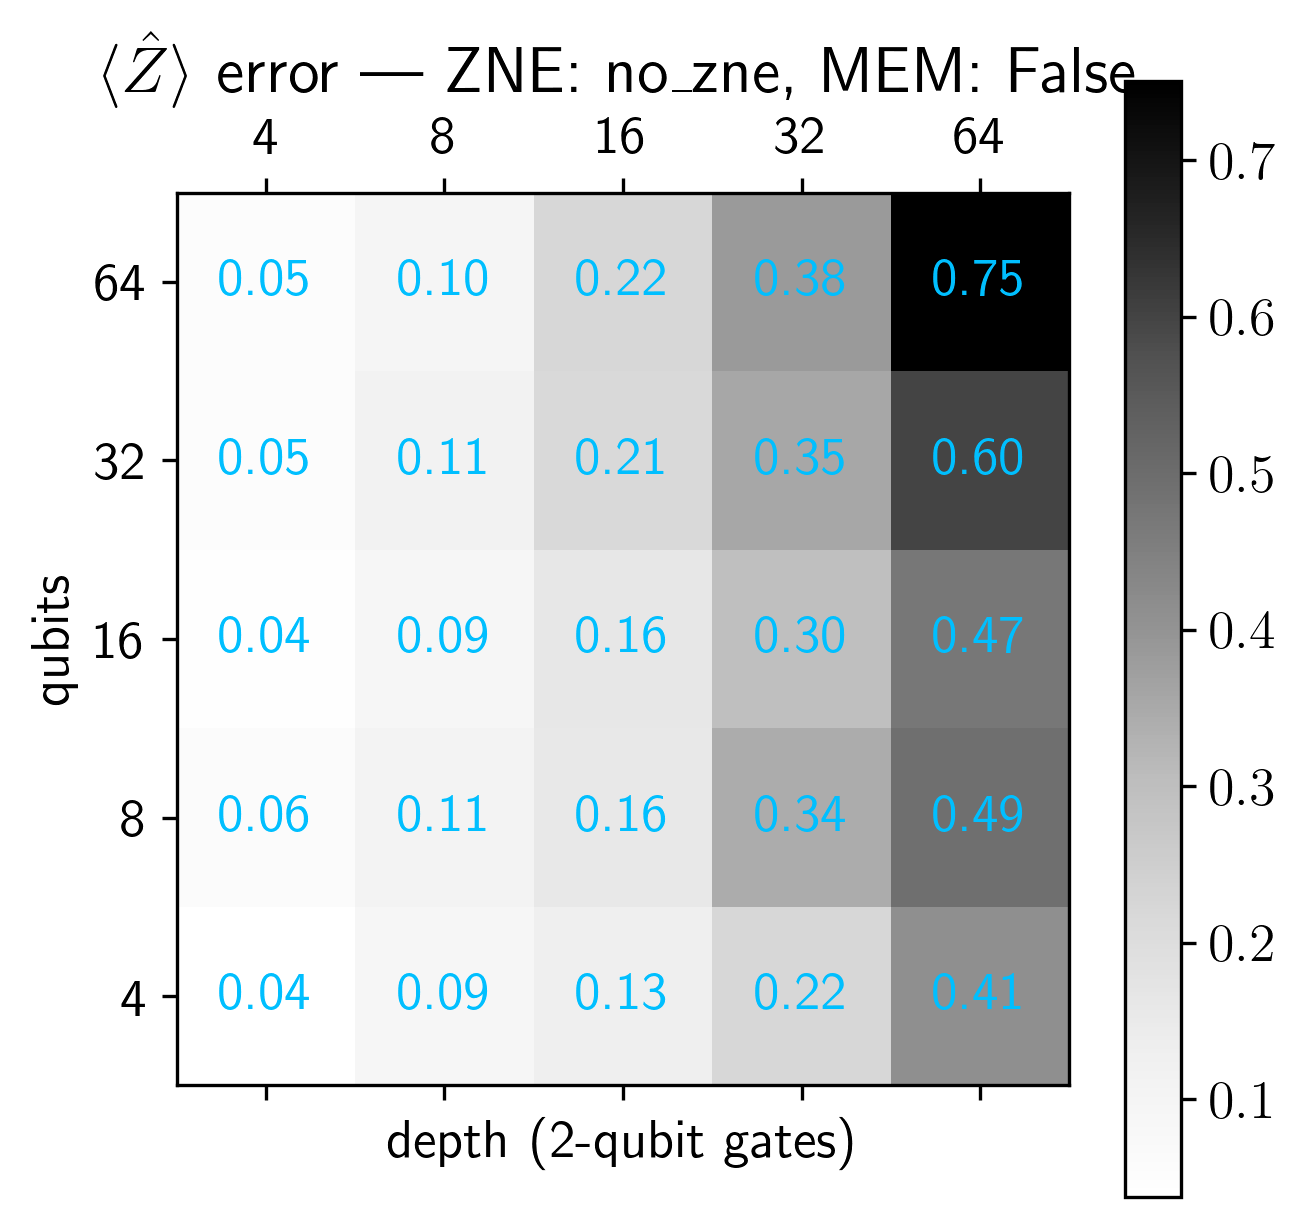

In [4]:
# Generate some random data (replace this with your actual data)
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

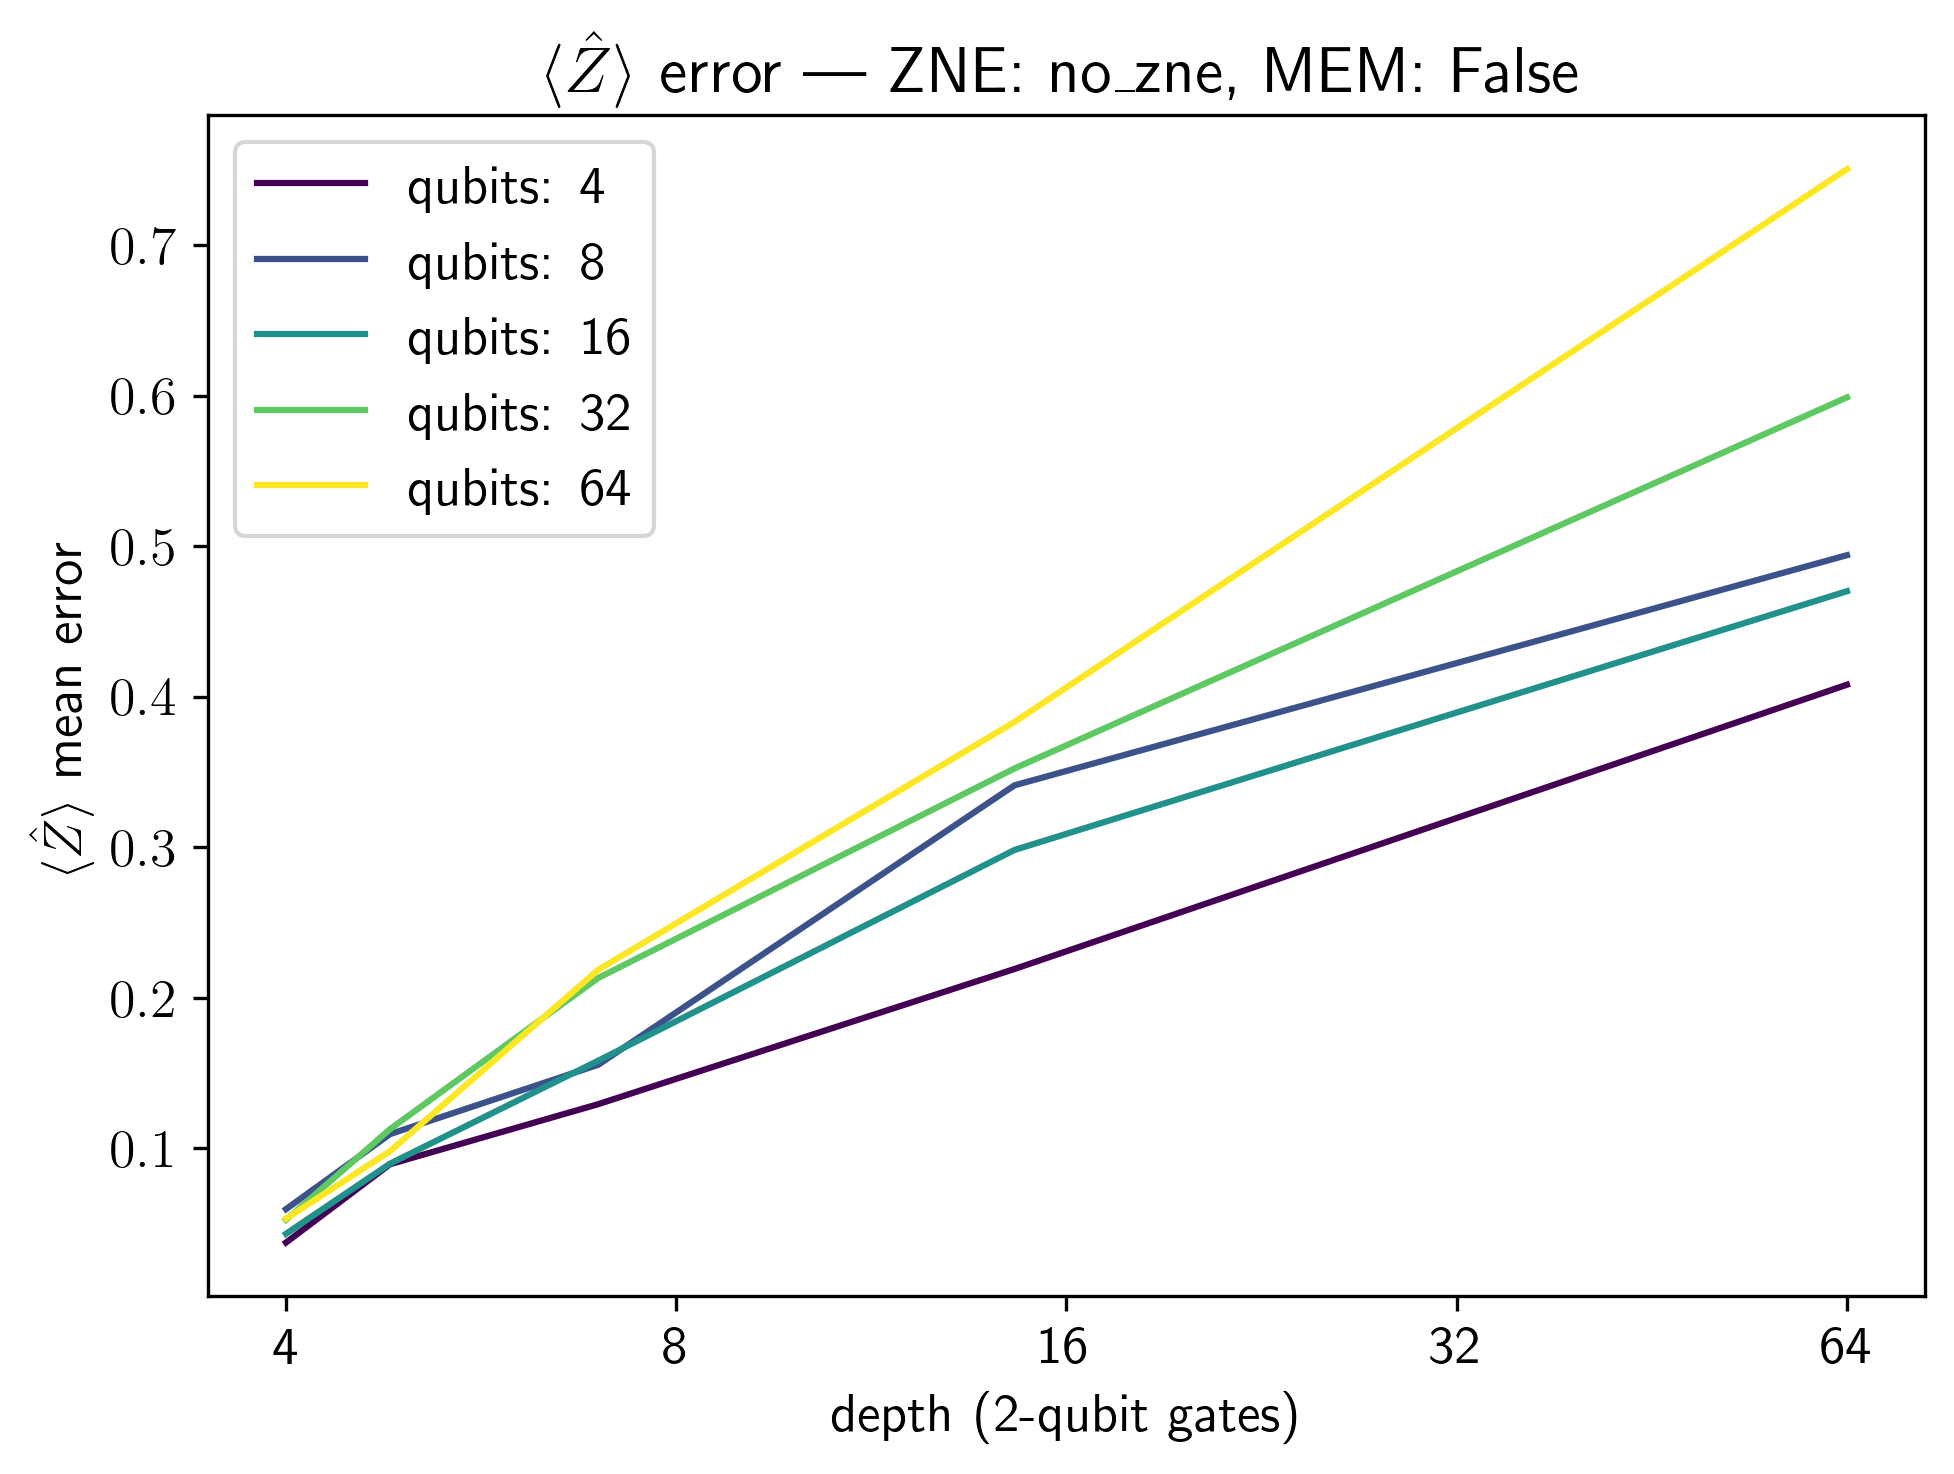

In [5]:
plot_results(data, qubits, depths, zne_extrapolator, mem)

## ZNE with no Measure Mitigation

In [42]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
job_ids = retrieve_job_id(qubits[0], depths[0], "no_zne", False, "logs/jobs_qubits_[4, 8, 16, 32, 64]_depths_[4, 8, 16, 32, 64]_pauli-Z_weight_1_stat_shots_3_zne_False_mem_False")
job = service.job(job_id=job_ids[0])
backend = job.backend()
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
construct_batches_execution(LIST_QUBITS=qubits, LIST_DEPTHS=depths, stat_shots=3, zne=True, backend=backend)

construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 4, stat: 0
n_qubits: 4, depth: 4, stat: 1
n_qubits: 4, depth: 4, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 8, stat: 0
n_qubits: 4, depth: 8, stat: 1
n_qubits: 4, depth: 8, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 16, stat: 0
n_qubits: 4, depth: 16, stat: 1
n_qubits: 4, depth: 16, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 32, stat: 0
n_qubits: 4, depth: 32, stat: 1
n_qubits: 4, depth: 32, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_

### Linear ZNE

In [6]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]

In [ ]:
zne = True
zne_extrapolator = "linear"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
# Generate some random data (replace this with your actual data)
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

In [ ]:
plot_results(data, qubits, depths, zne_extrapolator, mem)

### Quadratic ZNE

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]

In [ ]:
zne = True
zne_extrapolator = "polynomial_degree_2"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

### Exponential ZNE

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]

In [ ]:
zne = True
zne_extrapolator = "exponential"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

## ZNE with Measure Mitigation

In [10]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
job_ids = retrieve_job_id(qubits[0], depths[0], "no_zne", False, "logs/jobs_qubits_[4, 8, 16, 32, 64]_depths_[4, 8, 16, 32, 64]_pauli-Z_weight_1_stat_shots_3_zne_False_mem_False")
job = service.job(job_id=job_ids[0])
backend = job.backend()
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
construct_batches_execution(LIST_QUBITS=qubits, LIST_DEPTHS=depths, stat_shots=3, zne=True, backend=backend, err_mitig=1)

construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 4, stat: 0
n_qubits: 4, depth: 4, stat: 1
n_qubits: 4, depth: 4, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 8, stat: 0
n_qubits: 4, depth: 8, stat: 1
n_qubits: 4, depth: 8, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 16, stat: 0
n_qubits: 4, depth: 16, stat: 1
n_qubits: 4, depth: 16, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_qubits: 4, depth: 32, stat: 0
n_qubits: 4, depth: 32, stat: 1
n_qubits: 4, depth: 32, stat: 2
construct logical circuit...
construct logical observable...
construct physical circuit...
construct physical observable...
n_

### Linear ZNE

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
zne = True
zne_extrapolator = "linear"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

### Quadratic ZNE

In [ ]:
zne = True
zne_extrapolator = "polynomial_degree_2"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

### Exponential ZNE

In [ ]:
zne = True
zne_extrapolator = "exponential"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

# Double Pauli Weight

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
job_ids = retrieve_job_id(qubits[0], depths[0], "no_zne", False, "logs/jobs_qubits_[4, 8, 16, 32, 64]_depths_[4, 8, 16, 32, 64]_pauli-Z_weight_1_stat_shots_3_zne_False_mem_False")
job = service.job(job_id=job_ids[0])
backend = job.backend()
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
construct_batches_execution(LIST_QUBITS=qubits, LIST_DEPTHS=depths, stat_shots=3, zne=True, backend=backend, err_mitig=1, pauli_weight=2)

### Linear ZNE

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
zne = True
zne_extrapolator = "linear"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

### Quadratic ZNE

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
zne = True
zne_extrapolator = "plynomial_degree_2"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

### Exponential ZNE

In [ ]:
service = QiskitRuntimeService(name="ibm-ikerbasque")
qubits = [4,8,16,32,64]
depths = [4,8,16,32,64]
zne = True
zne_extrapolator = "exponential"
mem = False

mean_errors = retrieve_results(qubits, depths, zne_extrapolator, mem, zne, service)

In [ ]:
data = (1 - np.asarray(mean_errors)).reshape((len(qubits),len(depths)))

plot_colormap(data, qubits, depths, zne_extrapolator, mem)

# Retrieve trials

In [34]:
from qs_qh.utils import retrieve_job_id

job_ids = retrieve_job_id(4, 4, "no_zne", False, "logs/jobs_qubits_[4, 8]_depths_[4]_pauli-Z_weight_1_stat_shots_3")

print(len(job_ids))

3


In [35]:
service = QiskitRuntimeService(name="ibm-ikerbasque")

In [38]:
res = []
for job_id in job_ids:
    job = service.job(job_id=job_id)
    job.backend
    result = job.result()[0]
    ev = result.data.evs.tolist()
    res.append(ev)
    print(f"- {ev} (linear)")
mean = np.mean(np.asarray(res))
std = np.std(np.asarray(res))

print(f"mean: {mean}, std: {std}")

- 0.9622802734375 (linear)
- 0.9610595703125 (linear)
- 0.960205078125 (linear)
mean: 0.961181640625, std: 0.0008515807916852356


### Get results and Plot

In [4]:
service = QiskitRuntimeService(name="ibm-ikerbasque")

In [5]:
zne = False
zne_extrapolator = "no_zne"
mem = False
mean_errors = []
for qubit in qubits:
    for depth in depths:
        job_ids = retrieve_job_id(qubit, depth, zne_extrapolator, mem, f"logs/jobs_qubits_{qubits}_depths_{depths}_pauli-Z_weight_1_stat_shots_3_zne_{zne}_mem_{mem}")
        res = []
        for job_id in job_ids:
            job = service.job(job_id=job_id)
            result = job.result()[0]
            ev = result.data.evs.tolist()
            res.append(ev)
            print(f"- {ev} (linear)")
        mean = np.mean(np.asarray(res))
        std = np.std(np.asarray(res))
        mean_errors.append(mean)

NameError: name 'qubits' is not defined